In [ ]:
!pip install shap

In [4]:
import shap

##Utilizzo della metodologia: shap

Modelli di classificazione con un dataset composto da diverse variabili
relativo a studi del cancro al seno.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
df = pd.read_csv("http://bit.ly/YDTSampleDataset")

# Analisi esplorativa

## Analisi univariata

In [48]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.0869,0.07017,NaN,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.1860,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.14440,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.20980,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.13280,0.1980,NaN,0.1809,NaN,...,16.67,152.20,1575.0,0.13740,NaN,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,NaN,0.2439,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.1440,0.09791,0.1752,NaN,...,38.25,155.00,1731.0,0.11660,0.1922,0.3215,0.1628,0.2572,NaN,0
566,16.60,28.08,108.30,NaN,0.08455,0.10230,NaN,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,NaN,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,NaN,...,NaN,184.60,1821.0,0.16500,0.8681,0.9387,0.2650,0.4087,0.12400,0


<Axes: ylabel='Frequency'>

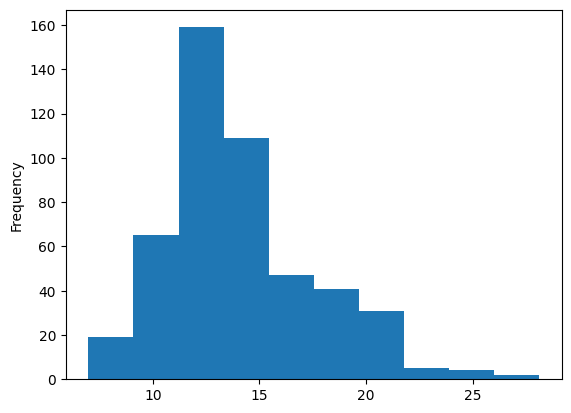

In [8]:
df['mean radius'].plot(kind = 'hist')

<Axes: >

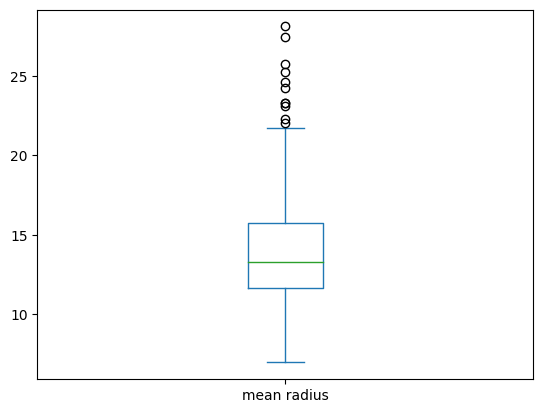

In [9]:
df['mean radius'].plot(kind = 'box')

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,482.0,14.059548,3.501791,6.981000,11.672500,13.280000,15.745000,28.11000
mean texture,492.0,19.311829,4.347769,9.710000,16.170000,18.860000,21.802500,39.28000
mean perimeter,513.0,92.039025,24.028669,43.790000,75.270000,86.340000,104.700000,188.50000
mean area,403.0,661.522581,356.669534,143.500000,428.100000,556.700000,796.000000,2501.00000
mean smoothness,384.0,0.097156,0.014502,0.052630,0.086688,0.096565,0.106825,0.16340
mean compactness,480.0,0.104531,0.053335,0.019380,0.064815,0.093125,0.130325,0.34540
mean concavity,439.0,0.094063,0.083301,0.000000,0.030410,0.068240,0.135100,0.42680
mean concave points,382.0,0.049115,0.038449,0.000000,0.020682,0.033770,0.074122,0.20120
mean symmetry,471.0,0.181405,0.027633,0.106000,0.161950,0.179100,0.196600,0.29060
mean fractal dimension,504.0,0.062626,0.007102,0.049960,0.057530,0.061300,0.066003,0.09744


## Analisi multivariata

In [11]:
df2 = df.iloc[0:100,0:5]

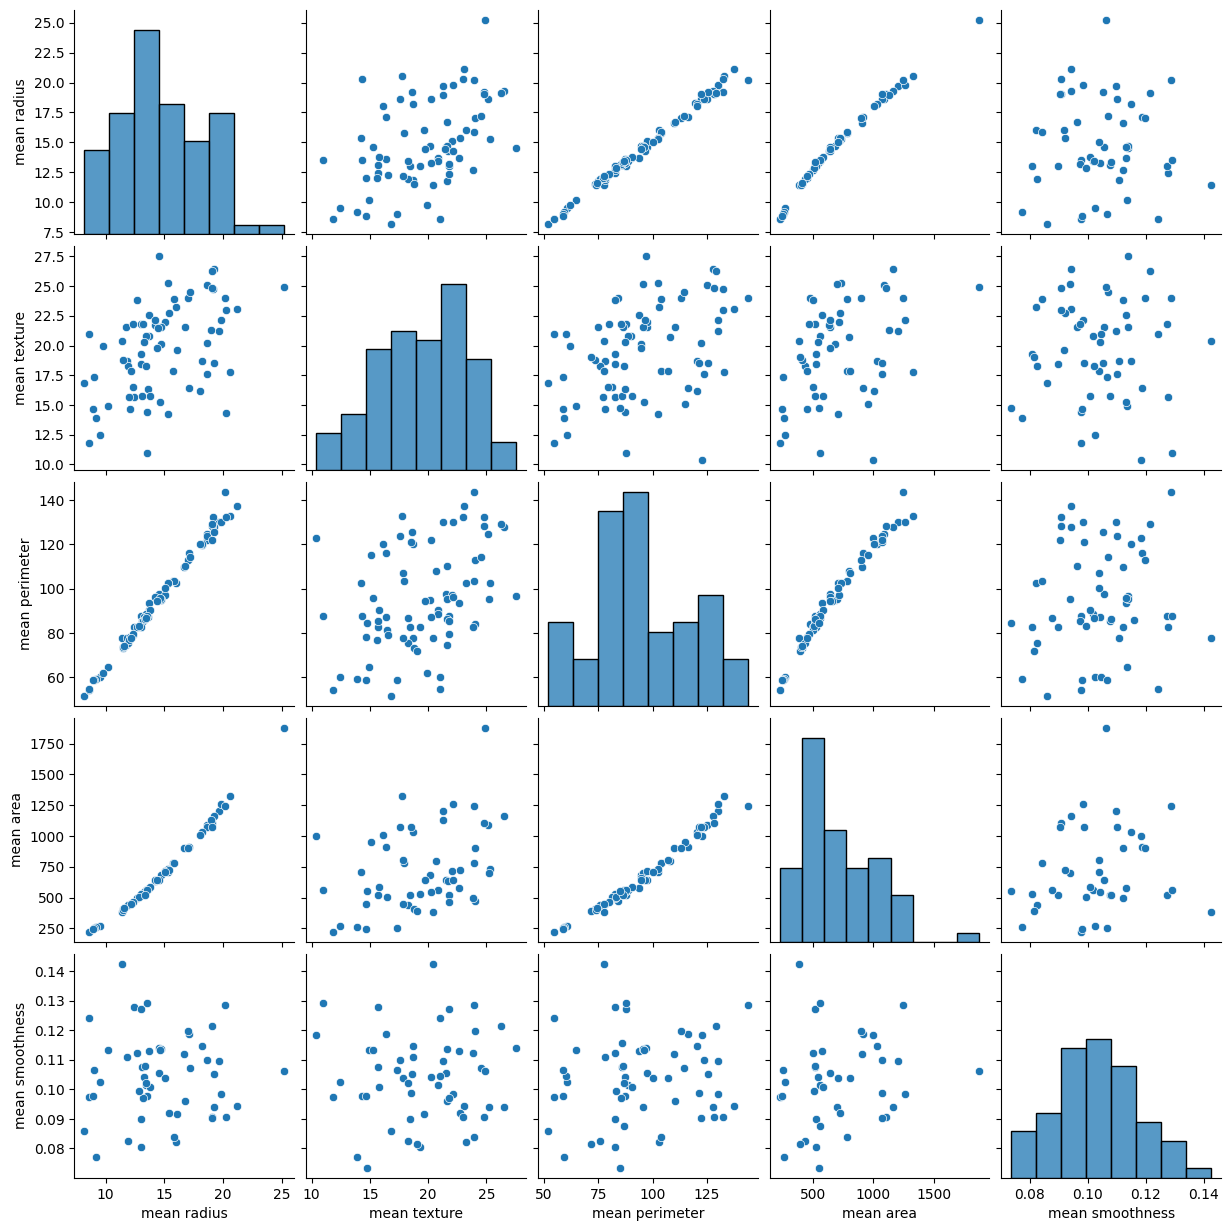

In [12]:
sns.pairplot(df2)

In [13]:
df.corr().abs()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.325048,0.997917,0.985544,0.174663,0.538038,0.669628,0.824008,0.133417,0.300202,...,0.341666,0.962182,0.940064,0.148959,0.467609,0.542298,0.757117,0.164307,0.010295,0.732425
mean texture,0.325048,1.000000,0.346173,0.331863,0.027530,0.194730,0.266315,0.318055,0.050521,0.084390,...,0.906691,0.365793,0.355472,0.091203,0.254561,0.284586,0.287045,0.116212,0.125186,0.401623
mean perimeter,0.997917,0.346173,1.000000,0.984596,0.216465,0.543423,0.699639,0.841415,0.179526,0.255071,...,0.350760,0.967086,0.938398,0.148894,0.459167,0.561462,0.767027,0.208464,0.054657,0.747156
mean area,0.985544,0.331863,0.984596,1.000000,0.243077,0.511137,0.688334,0.833180,0.227485,0.261360,...,0.323158,0.955064,0.962428,0.160463,0.381476,0.508175,0.707686,0.143392,0.001199,0.708695
mean smoothness,0.174663,0.027530,0.216465,0.243077,1.000000,0.659016,0.514269,0.551066,0.537296,0.605252,...,0.067103,0.273250,0.197203,0.802707,0.498369,0.418206,0.502253,0.402976,0.541628,0.352710
mean compactness,0.538038,0.194730,0.543423,0.511137,0.659016,1.000000,0.879309,0.819829,0.621033,0.557747,...,0.184561,0.601413,0.510924,0.549237,0.874209,0.810086,0.809629,0.538014,0.691924,0.597064
mean concavity,0.669628,0.266315,0.699639,0.688334,0.514269,0.879309,1.000000,0.923731,0.550682,0.374206,...,0.291333,0.734949,0.673204,0.452264,0.752790,0.875606,0.846779,0.421957,0.535975,0.668180
mean concave points,0.824008,0.318055,0.841415,0.833180,0.551066,0.819829,0.923731,1.000000,0.483042,0.140263,...,0.330107,0.862274,0.805123,0.466339,0.691116,0.768695,0.909876,0.395455,0.365993,0.770338
mean symmetry,0.133417,0.050521,0.179526,0.227485,0.537296,0.621033,0.550682,0.483042,1.000000,0.501603,...,0.052486,0.227449,0.201576,0.427002,0.519371,0.449870,0.439186,0.732451,0.505831,0.340402
mean fractal dimension,0.300202,0.084390,0.255071,0.261360,0.605252,0.557747,0.374206,0.140263,0.501603,1.000000,...,0.089427,0.198293,0.219083,0.533255,0.474439,0.333802,0.176135,0.398122,0.781241,0.002829


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

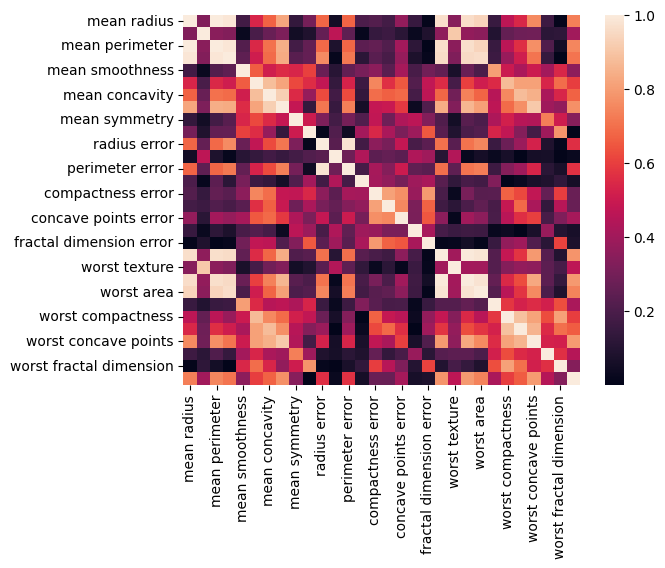

In [14]:
sns.heatmap(df.corr().abs())

<Axes: xlabel='mean radius', ylabel='Count'>

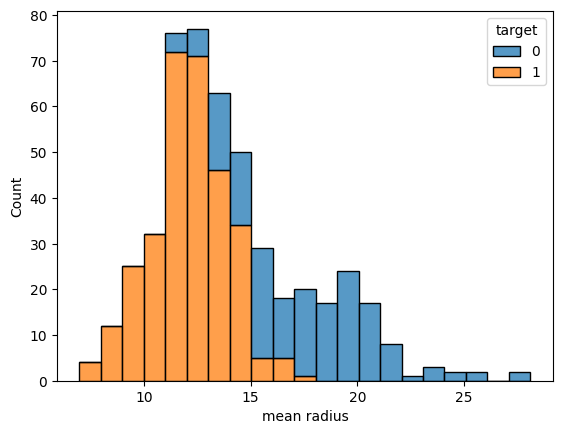

In [15]:
sns.histplot(df,x = "mean radius", hue = "target", multiple = "stack")

# Realizzazione del modello

In [16]:
X = df.drop("target", axis=1).select_dtypes(exclude="object")

In [17]:
y = df['target']

## Split in training e test

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

## Pulizia dei valori mancanti

In [19]:
cleaner = SimpleImputer(strategy = "mean")

In [20]:
cleaner.fit(X_train) # Fit SOLO sul training

SimpleImputer()

In [21]:
X_train = cleaner.transform(X_train)
X_test = cleaner.transform(X_test)

In [22]:
feature_names = X.columns

In [23]:
X_train

array([[1.12000000e+01, 2.93700000e+01, 7.06700000e+01, ...,
        1.18750940e-01, 1.56600000e-01, 5.90500000e-02],
       [1.98100000e+01, 2.21500000e+01, 1.30000000e+02, ...,
        2.38800000e-01, 2.76800000e-01, 7.61500000e-02],
       [1.63000000e+01, 1.57000000e+01, 1.04700000e+02, ...,
        1.35700000e-01, 2.30000000e-01, 7.23000000e-02],
       ...,
       [9.43600000e+00, 1.83200000e+01, 5.98200000e+01, ...,
        5.05200000e-02, 2.45400000e-01, 8.13600000e-02],
       [1.42361892e+01, 1.82200000e+01, 6.07300000e+01, ...,
        1.18750940e-01, 1.90900000e-01, 6.55900000e-02],
       [1.42361892e+01, 2.39300000e+01, 7.45200000e+01, ...,
        9.65300000e-02, 2.11200000e-01, 8.73200000e-02]])

In [24]:
# Esempi di pre-processing:
# Pulizia dei valori mancanti
# Simmetrizzazione
# Riscalatura

## Addestramento del modello

In [25]:
model = RandomForestClassifier(n_estimators = 20, random_state = 0)

In [26]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [27]:
np.arange(10,100,10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [28]:
search = GridSearchCV(model,
                      {'n_estimators':np.arange(10,100,10)},
                      scoring = 'accuracy'
                      )

In [29]:
search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=20, random_state=0),
             param_grid={'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='accuracy')

In [30]:
search.best_params_

{'n_estimators': 30}

In [31]:
search.best_score_

0.9442028985507246

In [32]:
model = RandomForestClassifier(n_estimators = 30, random_state = 0)

model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

In [33]:
y_pred = model.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.9342105263157895

In [35]:
confusion_matrix(y_test,y_pred)

array([[ 74,   9],
       [  6, 139]])

In [36]:
(74+139)/(74+139++9+6)

0.9342105263157895

In [37]:
# Classificazione
# Regressione logistica
# k-nearest neighbors
# Support Vector Machine
# Alberi decisionali
# Alberi decisionali in ensemble (random forest, gradient boosting etc.)
# Modelli bayesiani
# Reti neurali

# Spieghiamo il modello

## Analisi dell'importanza delle variabili

In [38]:
model.feature_importances_

array([0.07644297, 0.01008714, 0.06752339, 0.01920698, 0.00324141,
       0.02189256, 0.05927065, 0.04086229, 0.00263374, 0.00529101,
       0.01205844, 0.00643555, 0.00958118, 0.00715461, 0.00473485,
       0.00764284, 0.00885447, 0.00490059, 0.00899446, 0.07651537,
       0.00678837, 0.11366671, 0.04361322, 0.01040709, 0.01541712,
       0.13882231, 0.19265423, 0.02137839, 0.00392806])

In [39]:
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<Axes: >

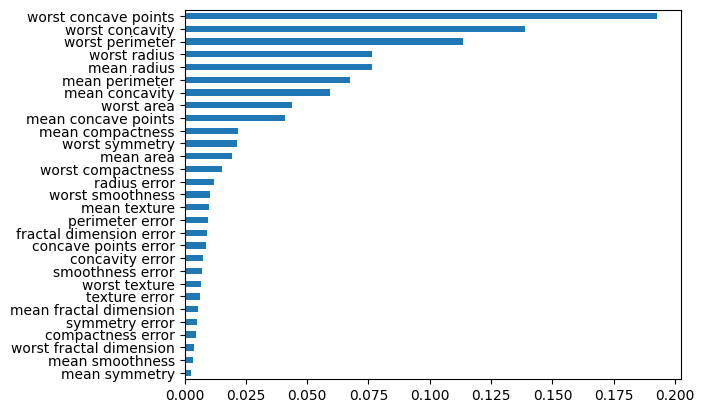

In [40]:
pd.Series(model.feature_importances_,index = feature_names).sort_values().plot(kind = 'barh')

In [41]:
explainer = shap.TreeExplainer(model)

In [42]:
shap_values = explainer.shap_values(X_test)

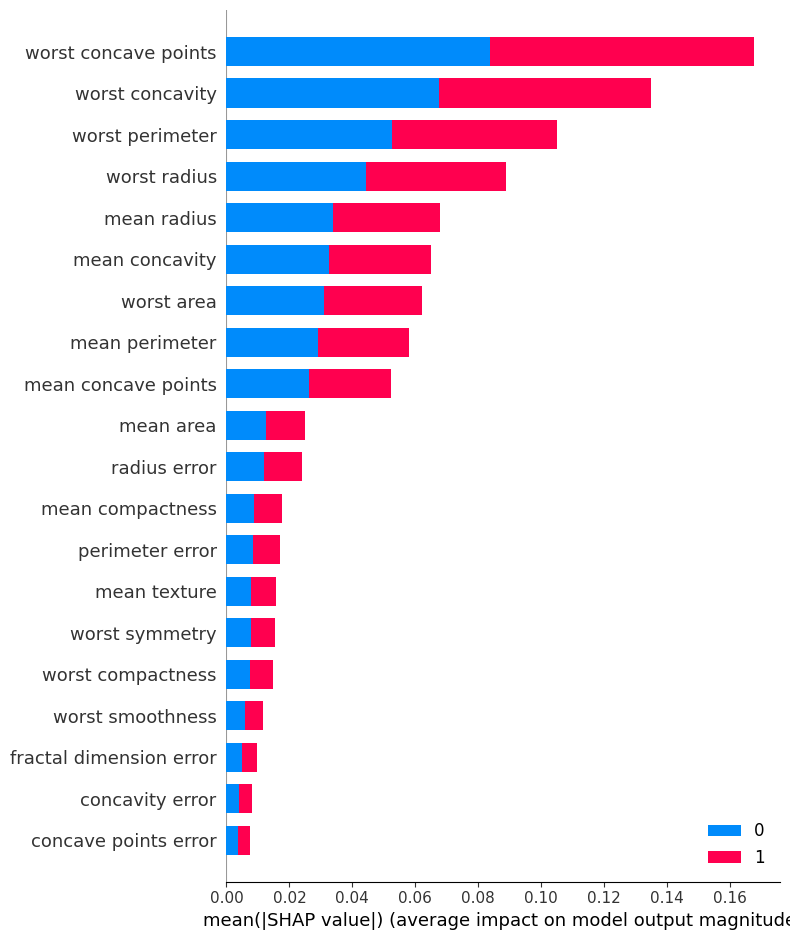

In [43]:
shap.summary_plot(shap_values,X_test,feature_names=feature_names, class_names = [0,1])

In [44]:
model.predict_proba(X_test)[:,1]

array([0.06666667, 0.96666667, 1.        , 0.9       , 1.        ,
       0.9       , 0.96666667, 0.86666667, 0.96666667, 1.        ,
       0.56666667, 1.        , 1.        , 0.33333333, 0.6       ,
       0.1       , 0.86666667, 0.03333333, 0.        , 0.        ,
       0.13333333, 0.        , 0.86666667, 1.        , 0.03333333,
       0.96666667, 0.96666667, 0.36666667, 1.        , 0.        ,
       1.        , 0.03333333, 0.73333333, 0.1       , 1.        ,
       0.1       , 1.        , 0.06666667, 1.        , 0.        ,
       0.83333333, 0.76666667, 0.46666667, 1.        , 0.43333333,
       0.        , 0.96666667, 1.        , 1.        , 0.36666667,
       0.        , 0.23333333, 0.        , 1.        , 1.        ,
       1.        , 0.93333333, 1.        , 0.96666667, 0.06666667,
       0.2       , 0.06666667, 1.        , 1.        , 0.03333333,
       0.86666667, 0.        , 0.03333333, 0.03333333, 0.96666667,
       0.4       , 0.        , 1.        , 0.73333333, 0.     

In [45]:
shap.initjs()
index = 0
shap.force_plot(explainer.expected_value[1],shap_values[1][index,:],X_test[index,:],feature_names = feature_names)

In [46]:
np.argmax(model.predict_proba(X_test)[:,1])

2

In [47]:
shap.initjs()
index = 2
shap.force_plot(explainer.expected_value[1],shap_values[1][index,:],X_test[index,:],feature_names = feature_names)